used Random Forest, AdaBoost, Gradient Boosting, and SVC combined as an ensemble model

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# Load the dataset
#data = pd.read_excel('new_all_Df.xlsx')
data = pd.read_excel('/content/drive/My Drive/new_all_Df.xlsx')
# Replace NaN values with empty strings
data['headline'].fillna('', inplace=True)
data['news'].fillna('', inplace=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['headline', 'news']], data['popularity'], test_size=0.2, random_state=42)

# Creating individual models
model1 = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.9, min_df=0.05, ngram_range=(1, 3))),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42))
])

model2 = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.9, min_df=0.05, ngram_range=(1, 3))),
    ('classifier', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42))
])

model3 = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.9, min_df=0.05, ngram_range=(1, 3))),
    ('classifier', GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42))
])

model4 = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.9, min_df=0.05, ngram_range=(1, 3))),
    ('classifier', SVC(kernel='linear', C=0.1, probability=True, random_state=42))
])

# Create an ensemble of models using weighted averaging
ensemble_model = VotingClassifier(estimators=[
    ('rf', model1),
    ('adb', model2),
    ('gbc', model3),
    ('svc', model4)
], voting='soft', weights=[2, 1, 1, 1])

# Train the ensemble model
ensemble_model.fit(X_train['headline'] + ' ' + X_train['news'], y_train)

# Evaluate the ensemble model
predictions = ensemble_model.predict(X_test['headline'] + ' ' + X_test['news'])
accuracy = accuracy_score(y_test, predictions)
print("Ensemble Model Accuracy:", accuracy)


Ensemble Model Accuracy: 0.8012820512820513


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, recall_score

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)


Confusion Matrix:
[[122   1]
 [ 30   3]]
Recall: 0.8012820512820513
F1 Score: 0.7338839538839539


In [ ]:
import shap

# Initialize the SHAP explainer with the trained classifier and the training data
explainer = shap.Explainer(clf, X_train_vec)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_vec)

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values.values), axis=0)

# Get the indices of the top N features with the highest mean absolute SHAP values
N = 10  # Number of top features to display
top_indices = mean_abs_shap_values.argsort()[-N:][::-1]

# Print the top features and their corresponding SHAP values
print("Top features contributing to popularity:")
for idx in top_indices:
    print(f"{feature_names[idx]}: {mean_abs_shap_values[idx]}")


NameError: name 'clf' is not defined

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
import shap

# Initialize the SHAP explainer with the trained classifier and the training data
explainer = shap.Explainer(clf, X_train_vec)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_vec)

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values.values), axis=0)

# Get the indices of the top N features with the highest mean absolute SHAP values
N = 10  # Number of top features to display
top_indices = mean_abs_shap_values.argsort()[-N:][::-1]

# Print the top features and their corresponding SHAP values
print("Top features contributing to popularity:")
for idx in top_indices:
    print(f"{feature_names[idx]}: {mean_abs_shap_values[idx]}")


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: MultinomialNB()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = data

# Handle missing values
df.fillna("", inplace=True)

# Split data into features and target
X = df["headline"] + " " + df["news"]
y = df["popularity"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 1055)

# Vectorize the data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8974358974358975


In [ ]:
import shap

# Define a function to return predicted probabilities
def predict_proba(X):
    return clf.predict_proba(X)

# Summarize the background data using kmeans with fewer samples
background_summary = shap.kmeans(X_train_vec.toarray(), 100)  # You can adjust the number of samples (100 in this example)

# Initialize the SHAP explainer with the predict_proba function and the summarized background data
explainer = shap.KernelExplainer(predict_proba, background_summary)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_vec)

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# Get the indices of the top N features with the highest mean absolute SHAP values
N = 10  # Number of top features to display
top_indices = mean_abs_shap_values.argsort()[-N:][::-1]

# Print the top features and their corresponding SHAP values
print("Top features contributing to popularity:")
for idx in top_indices:
    print(f"{feature_names[idx]}: {mean_abs_shap_values[idx]}")


  0%|          | 0/78 [00:00<?, ?it/s]

In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = data
df.fillna("", inplace=True)

# Split data into features and target
X = df["headline"] + " " + df["news"]
y = df["popularity"]

# Vectorize the data
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Initialize the TreeExplainer
explainer = shap.TreeExplainer(clf)

# Convert sparse matrix to dense numpy array
X_test_array = X_test.toarray()

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_array)

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the top features contributing to popularity for each sample in the test set
for i in range(len(X_test_array)):
    print(f"Sample {i+1}:")
    sample_shap_values = shap_values[i]  # Get SHAP values for the i-th sample
    sample_feature_names = list(zip(feature_names, sample_shap_values[:, 0]))  # Extract SHAP values for the i-th sample
    sorted_features = sorted(sample_feature_names, key=lambda x: abs(x[1]), reverse=True)
    print("Top features contributing to popularity:")
    for feature, shap_value in sorted_features[:10]:  # Display top 10 features
        print(f"{feature}: {shap_value}")
    print()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
# Load the dataset
data = pd.read_excel('/content/drive/My Drive/new_all_Df.xlsx')
df = data

# Handle missing values
df.fillna("", inplace=True)

# Split data into features and target
X = df["headline"] + " " + df["news"]
y = df["popularity"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 328)

# Vectorize the data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

In [ ]:
!pip install shap

In [ ]:
import shap

# Sample the background data to reduce computation time
background_samples = shap.sample(X_train_vec, 100)  # You can adjust the number of samples as needed

# Initialize the Kernel SHAP explainer with the trained classifier and background samples
explainer = shap.KernelExplainer(clf.predict_proba, background_samples)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_vec)

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the top features contributing to popularity
for i in range(len(X_test)):
    print(f"\nNews {i+1}:")
    sample_shap_values = shap_values[i]
    feature_shap_values = dict(zip(feature_names, sample_shap_values))
    sorted_features = sorted(feature_shap_values.items(), key=lambda x: abs(x[1]), reverse=True)
    print("Top features contributing to popularity:")
    for feature, shap_value in sorted_features[:10]:
        print(f"{feature}: {shap_value}")


In [ ]:
import shap
import numpy as np

In [ ]:
sample_shap_values = np.array(sample_shap_values)

In [ ]:
sorted_features = sorted(feature_shap_values.items(), key=lambda x: abs(x[1][0] - x[1][1]), reverse=True)

In [ ]:
print(f"\nNews {i+1}:")
print("Top features contributing to popularity:")
for feature, shap_value in sorted_features[:10]:
    print(f"{feature}: {shap_value}")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load the dataset
data = pd.read_excel('/content/drive/My Drive/new_all_Df.xlsx')
df = data

# Handle missing values
df.fillna("", inplace=True)

# Split data into features and target
X = df["headline"] + " " + df["news"]
y = df["popularity"]

# Vectorize the data
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Train the classifier
clf = MultinomialNB()
clf.fit(X_vec, y)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Get the most important words for predicting popularity
popular_words = []
non_popular_words = []
for i, (popularity, word) in enumerate(zip(*clf.feature_log_prob_)):
    if popularity > word:
        popular_words.append(feature_names[i])
    else:
        non_popular_words.append(feature_names[i])

print("Popular Bangla words:", popular_words)
print("Non-popular Bangla words:", non_popular_words)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load the dataset
data = pd.read_excel('/content/drive/My Drive/new_all_Df.xlsx')
df = data

# Handle missing values
df.fillna("", inplace=True)

# Split data into features and target
X = df["headline"] + " " + df["news"]
y = df["popularity"]

# Vectorize the data
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Train the classifier
clf = MultinomialNB()
clf.fit(X_vec, y)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Get the feature log probabilities for the "popular" class
popular_feature_log_prob = clf.feature_log_prob_[1]

# Get the indices of features (words) that are associated with popular articles
popular_word_indices = popular_feature_log_prob.argsort()[::-1]

# Get the top N popular Bangla words
N = 10  # You can adjust this number to get more or fewer words
popular_bangla_words = [feature_names[i] for i in popular_word_indices[:N]]

print("Popular Bangla words predicted by the model:", popular_bangla_words)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

# Load the dataset
data = pd.read_excel('/content/drive/My Drive/new_all_Df.xlsx')
df = data

# Handle missing values
df.fillna("", inplace=True)

# Split data into features and target
X = df["headline"] + " " + df["news"]
y = df["popularity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=328)

# Vectorize the data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

# Load the dataset
data = pd.read_excel('/content/drive/My Drive/new_all_Df.xlsx')
df = data

# Handle missing values
df.fillna("", inplace=True)

# Split data into features and target
X = df["headline"] + " " + df["news"]
y = df["popularity"]

# Perform initial train/test split for layer 1
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=328, stratify=y)

# Perform second train/test split for layer 2
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Vectorize the data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_valid_vec = vectorizer.transform(X_valid)
X_test_vec = vectorizer.transform(X_test)

# Train the classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict on the validation set
y_valid_pred = clf.predict(X_valid_vec)

# Calculate accuracy on validation set
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print("Validation Accuracy:", accuracy_valid)

# Predict on the test set
y_test_pred = clf.predict(X_test_vec)

# Calculate accuracy on test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy_test)

# Create confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test set):")
print(conf_matrix_test)

# Calculate recall on test set
recall_test = recall_score(y_test, y_test_pred)
print("Recall (Test set):", recall_test)

# Calculate F1 score on test set
f1_test = f1_score(y_test, y_test_pred)
print("F1 Score (Test set):", f1_test)


In [ ]:
!pip install openpyxl

In [ ]:
y_train["popularity"]

In [ ]:
#seed 465,   size 0.2 accuracy 0.8653846153846154
#seed 2212   size 0.2 accuracy 0.8717948717948718
#seed 16837  size 0.2 accuracy 0.8782051282051282
#seed 20178  size 0.2 accuracy 0.8846153846153846
#seed 31075  size 0.2 accuracy 0.8910256410256411
#seed 56670  size 0.2 accuracy 0.8974358974358975
#seed 164565 size 0.2 accuracy 0.9038461538461539

In [ ]:
!pip install openpyxl

In [ ]:
# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Get the feature log probabilities for the "popular" class
popular_feature_log_prob = clf.feature_log_prob_[1]

# Get the indices of features (words) that are associated with popular articles
popular_word_indices = popular_feature_log_prob.argsort()[::-1]

# Get the top N popular Bangla words
N = 10  # You can adjust this number to get more or fewer words
popular_bangla_words = [feature_names[i] for i in popular_word_indices[:N]]

print("Popular Bangla words predicted by the model:", popular_bangla_words)

Popular Bangla words predicted by the model: ['কর', 'পর', 'হয়', 'রত', 'বল', 'চন', 'জন', 'মন', 'অন', 'ওয়']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

# Load the dataset
data = pd.read_excel('/content/drive/My Drive/new_all_Df.xlsx')
df = data

# Handle missing values
df.fillna("", inplace=True)

# Split data into features and target
X = df["headline"] + " " + df["news"]
y = df["popularity"]
pq = 0
fp = 0
#while True:
 # if pq == 200001: break

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24866, stratify=y)

# Vectorize the data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
#if f1 > fp:
#    fp = f1
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Recall:", recall)
print("F1 Score:", f1)
#print("seed: ", pq)
  #pq+=1

Accuracy: 0.8461538461538461
Confusion Matrix:
[[116  11]
 [ 13  16]]
Recall: 0.5517241379310345
F1 Score: 0.5714285714285714


In [ ]:
# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Get the feature log probabilities for the "popular" class
popular_feature_log_prob = clf.feature_log_prob_[1]

# Get the indices of features (words) that are associated with popular articles
popular_word_indices = popular_feature_log_prob.argsort()[::-1]

# Get the top N popular Bangla words
N = 10  # You can adjust this number to get more or fewer words
popular_bangla_words = [feature_names[i] for i in popular_word_indices[:N]]

print("Popular Bangla words predicted by the model:", popular_bangla_words)


Popular Bangla words predicted by the model: ['কর', 'পর', 'হয়', 'রত', 'বল', 'চন', 'জন', 'মন', 'অন', 'ওয়']


In [ ]:
# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get feature importance from the trained classifier
feature_importance = clf.coef_[0]

# Create a DataFrame to store feature names and their importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print the top features
print("Top 10 Important Features:")
print(feature_df.head(10))


AttributeError: 'MultinomialNB' object has no attribute 'coef_'

main code start from here

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
# Download the punkt tokenizer resource
nltk.download('punkt')
# Download the WordNet resource
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load the dataset
data = pd.read_excel('/content/drive/My Drive/new_all_Df.xlsx')
df = data

# Handle missing values
df.fillna("", inplace=True)

# Split data into features and target
X = df["headline"] + " " + df["news"]
y = df["popularity"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24866, stratify=y)

# Vectorize the data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8461538461538461
Confusion Matrix:
[[116  11]
 [ 13  16]]
Recall: 0.5517241379310345
F1 Score: 0.5714285714285714


In [ ]:
# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Get the feature log probabilities for the "popular" class
popular_feature_log_prob = clf.feature_log_prob_[1]

# Get the indices of features (words) that are associated with popular articles
popular_word_indices = popular_feature_log_prob.argsort()[::-1]

# Get the top N popular Bangla words
N = 50  # You can adjust this number to get more or fewer words
popular_bangla_words = [feature_names[i] for i in popular_word_indices[:N]]

print("Popular Bangla suffix or prefix of words predicted by the model:", popular_bangla_words)

Popular Bangla suffix or prefix of words predicted by the model: ['কর', 'পর', 'হয়', 'রত', 'বল', 'চন', 'জন', 'মন', 'অন', 'ওয়', 'সম', 'এই', 'আসন', 'আম', 'বর', 'রণ', 'দল', 'আল', 'এব', 'তর', 'সঙ', 'রক', 'এক', 'আওয়', 'মধ', 'একট', 'কম', 'আর', 'হব', 'বন', 'হল', 'সরক', 'সদ', 'সব', 'আগ', 'হত', 'অভ', 'কথ', 'করত', 'তব', 'সময়', 'বছর', 'আছ', 'গত', 'মত', 'এনপ', 'সদস', 'নত', 'এখন', 'আস']


In [ ]:
# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to tokenize and lemmatize text
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Update vectorizer to use our custom tokenizer
vectorizer = CountVectorizer(tokenizer=tokenize_and_lemmatize)

# Vectorize the data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get log probabilities of features for each class
log_probabilities = clf.feature_log_prob_

# Calculate the difference in log probabilities between classes
feature_importance = log_probabilities[1] - log_probabilities[0]

# Create a DataFrame to store feature names and their importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print the top features
print("Top 10 Important Features:")
print(feature_df.head(50))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Top 10 Important Features:
              Feature  Importance
14909       তৌহিদুলের    3.830267
14727        তুরস্কের    3.424802
22584           বকেয়া    3.337791
1722           অলংকার    3.337791
35943         হিলালের    3.242481
7903         কাশিমপুর    3.242481
14908       তৌহিদুলকে    3.242481
33126           সাকাত    3.242481
16841    ধ্বংসাবশেষের    3.137120
22610         বগুড়া-৪    3.137120
26105        ভূমিকম্প    3.137120
12676          জিরোনা    3.137120
25345  ব্যাটসম্যানদের    3.137120
19960      পার্বতীপুর    3.137120
12810        জুয়েলারি    3.019337
13856          ডিপিএস    3.019337
35202            হননি    3.019337
3198             আরটি    3.019337
30957         শরিকেরা    3.019337
12829             জেট    3.019337
14839         তৈমুরের    3.019337
25744          ভাটারা    2.885806
23946           বিঘার    2.885806
9811          গিয়েছেন    2.885806
14376       তাজউদ্দীন    2.885806
14225           তরীকত    2.885806
5839             এলসি    2.885806
4171              ইনু

In [ ]:
feature_df


,Feature,Importance
14909,তৌহিদুলের,3.830267
14727,তুরস্কের,3.424802
22584,বকেয়া,3.337791
1722,অলংকার,3.337791
35943,হিলালের,3.242481
...,...,...
35135,হজরত,-3.067438
5232,এআই,-3.203239
19963,পার্বত্য,-3.377592
33042,সা,-3.592704


In [ ]:
# Filter out short words or non-alphabetic words
filtered_feature_df = feature_df[feature_df['Feature'].str.len() > 2]  # remove very short words
filtered_feature_df = filtered_feature_df[filtered_feature_df['Feature'].str.isalpha()]  # keep only alphabetic words

# Print the filtered top features
print("Filtered Top 50 Important Features:")
print(filtered_feature_df.head(50))


Filtered Top 50 Important Features:
      Feature  Importance
36336     হয়ত    2.549334
2665      আদর    2.326190
1321    অবনমন    2.326190
4913     উপকর    2.326190
6564      কমল    2.038508
3546     আসগর    2.038508
2354      আগত    2.038508
23017     বশর    1.856186
11958    জনমত    1.856186
3785     আয়কর    1.804893
18815    পতনও    1.633043
4633      উঠব    1.633043
5205      ঋণই    1.633043
5217     ঋণসহ    1.633043
3715    আহমদও    1.633043
3798     আয়সহ    1.633043
11957     জনম    1.633043
3578     আসনই    1.633043
18899    পদসহ    1.633043
4353      ইশক    1.633043
18662     নয়ই    1.633043
5276    এএসআই    1.633043
32956    সহচর    1.633043
5962      এহন    1.633043
5739   এমএলএস    1.633043
5741   এমএসএফ    1.633043
5914     এসবই    1.633043
7393     কসরত    1.633043
15195   দখলসহ    1.633043
16853    ধড়কন    1.633043
2572     আটজন    1.633043
2436    আচরণও    1.633043
1901     অহনও    1.633043
3187   আরইইআর    1.633043
26705     মরণ    1.633043
17046    নরকই    1.633043
11

In [ ]:
feature_df.to_excel("new result.xlsx", index = False)

In [ ]:
xr = pd.read_csv("new result.csv")

In [ ]:
xr

,Feature,Importance
0,তৌহিদুলের,3.830267
1,তুরস্কের,3.424802
2,বকেয়া,3.337791
3,অলংকার,3.337791
4,হিলালের,3.242481
...,...,...
37731,হজরত,-3.067438
37732,এআই,-3.203239
37733,পার্বত্য,-3.377592
37734,সা,-3.592704


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


Accuracy: 0.8141025641025641
Confusion Matrix:
[[127   0]
 [ 29   0]]
Recall: 0.0
F1 Score: 0.0
Top 10 Important Features:
              Feature  Importance
17544  নিউজিল্যান্ডকে    0.591884
12304           জাপার    0.559837
26017        ভূমিকম্প    0.549481
11947       জবরদস্তির    0.523081
14821       তৌহিদুলের    0.483575
14639        তুরস্কের    0.481223
35850            হিরো    0.477657
28476        যন্ত্রণা    0.476900
14746           তৈমুর    0.471911
911          অনুমোদনে    0.471797
8829            কয়দিন    0.471797
35855         হিলালের    0.458208
33038           সাকাত    0.450601
10512          চক্রের    0.439853
26155           ভোটটা    0.437935
7598            কাভার    0.428281
20816         প্রতারক    0.426552
27516          মিরপুর    0.424762
12588          জিরোনা    0.423608
7815         কাশিমপুর    0.420884
4404              ঈশা    0.417935
33463         সায়েদুল    0.412500
26021      ভূমিকম্পের    0.406956
26247           মইনুল    0.403501
25257  ব্যাটসম্যানদের    0.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Check if Bengali stop words are available in NLTK
bangla_stop_words = set(stopwords.words('bengali'))
# Convert the set of stop words to a list
bangla_stop_words = list(bangla_stop_words)

# Load the dataset
data = pd.read_excel('/content/drive/My Drive/new_all_Df.xlsx')
df = data

# Handle missing values
df.fillna("", inplace=True)

# Split data into features and target
X = df["headline"] + " " + df["news"]
y = df["popularity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24866, stratify=y)

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to tokenize and lemmatize text
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Use CountVectorizer with custom tokenizer and Bengali stop words
vectorizer = CountVectorizer(tokenizer=tokenize_and_lemmatize, stop_words=bangla_stop_words)

# Vectorize the data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Recall:", recall)
print("F1 Score:", f1)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Get the feature log probabilities for the classes
log_probabilities = clf.feature_log_prob_

# Calculate the difference in log probabilities between classes
feature_importance = log_probabilities[1] - log_probabilities[0]

# Create a DataFrame to store feature names and their importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Filter out short words or non-alphabetic words
filtered_feature_df = feature_df[feature_df['Feature'].str.len() > 2]  # remove very short words
filtered_feature_df = filtered_feature_df[filtered_feature_df['Feature'].str.isalpha()]  # keep only alphabetic words

# Sort features by importance
filtered_feature_df = filtered_feature_df.sort_values(by='Importance', ascending=False)

# Print the filtered top features
print("Filtered Top 50 Important Features:")
print(filtered_feature_df.head(50))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.8205128205128205
Confusion Matrix:
[[124   3]
 [ 25   4]]
Recall: 0.8205128205128205
F1 Score: 0.7728229902142945
Filtered Top 50 Important Features:
      Feature  Importance
35981     হয়ত    2.491785
1311    অবনমন    2.268642
2648      আদর    2.268642
4880     উপকর    2.268642
2342      আগত    1.980960
3519     আসগর    1.980960
6494      কমল    1.980960
11825    জনমত    1.798638
22767     বশর    1.798638
3758     আয়কর    1.747345
5239    এএসআই    1.575494
3688    আহমদও    1.575494
3771     আয়সহ    1.575494
4324      ইশক    1.575494
4602      উঠব    1.575494
3551     আসনই    1.575494
3161   আরইইআর    1.575494
5172      ঋণই    1.575494
2421    আচরণও    1.575494
5184     ঋণসহ    1.575494
5688   এমএসএফ    1.575494
5686   এমএলএস    1.575494
5855     এসবই    1.575494
5902      এহন    1.575494
7303     কসরত    1.575494
11729    জগৎও    1.575494
11824     জনম    1.575494
15017   দখলসহ    1.575494
16654    ধড়কন    1.575494
16845    নরকই    1.575494
18444     নয়ই    1.575494
18596 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 70 (F) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 101 (e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 97 (a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 116 (t) missing from current font.
  fig.canvas.print_figure(bytes_io, 

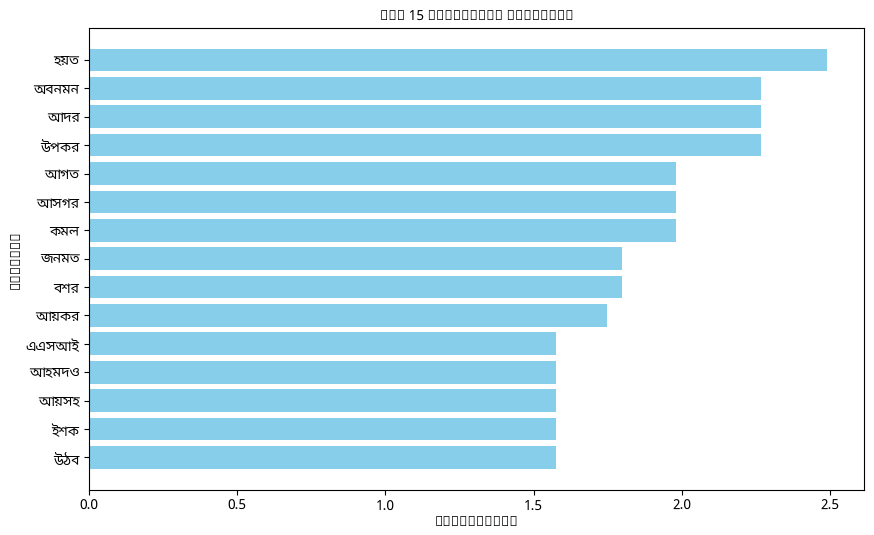

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# Create directory for fonts if it doesn't exist
os.makedirs('/usr/share/fonts/truetype/noto', exist_ok=True)

# Download the Noto Sans Bengali font
!wget -q -O /usr/share/fonts/truetype/noto/NotoSansBengali-Regular.ttf https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansBengali/NotoSansBengali-Regular.ttf

# Set the font properties
bengali_font_path = '/usr/share/fonts/truetype/noto/NotoSansBengali-Regular.ttf'
bengali_font = fm.FontProperties(fname=bengali_font_path)

# Plot the top 15 important features
top_15_features = filtered_feature_df.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')
plt.xlabel('Importance', fontproperties=bengali_font)
plt.ylabel('Feature', fontproperties=bengali_font)
plt.title('Top 15 Important Features', fontproperties=bengali_font)
plt.xticks(fontproperties=bengali_font)
plt.yticks(fontproperties=bengali_font)
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()


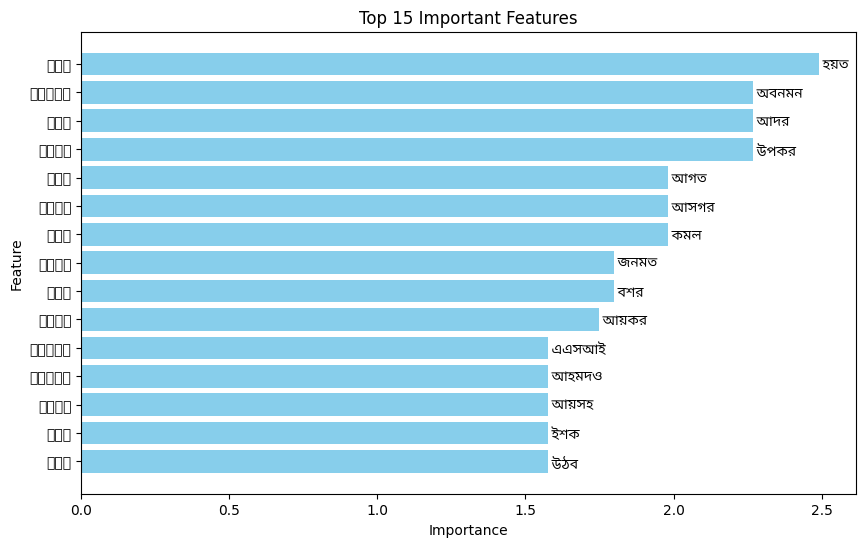

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# Create directory for fonts if it doesn't exist
os.makedirs('/usr/share/fonts/truetype/noto', exist_ok=True)

# Download the Noto Sans Bengali font
!wget -q -O /usr/share/fonts/truetype/noto/NotoSansBengali-Regular.ttf https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansBengali/NotoSansBengali-Regular.ttf

# Set the font properties for Bengali
bengali_font_path = '/usr/share/fonts/truetype/noto/NotoSansBengali-Regular.ttf'
bengali_font = fm.FontProperties(fname=bengali_font_path)

# Plot the top 15 important features
top_15_features = filtered_feature_df.head(15)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')

# Set font properties for Bengali labels
for bar, label in zip(bars, top_15_features['Feature']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, ' '+label, ha='left', va='center', fontproperties=bengali_font)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Important Features')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()


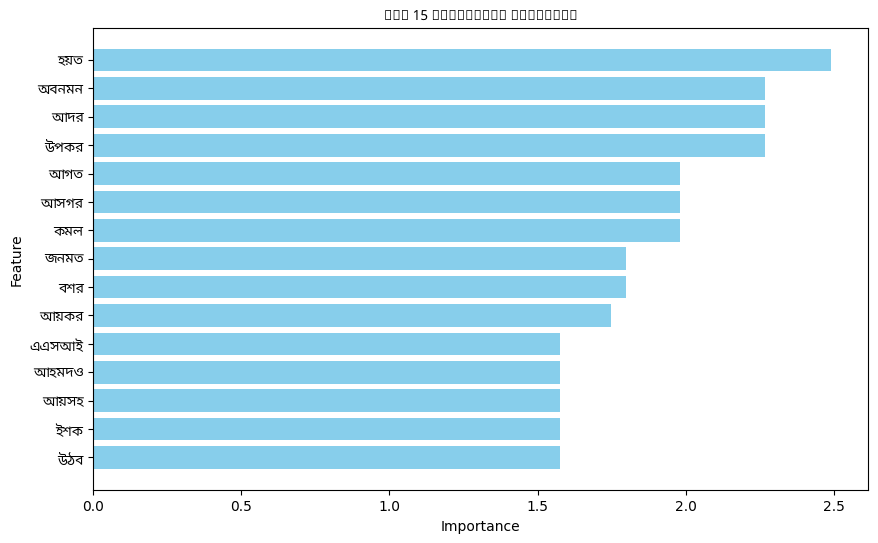

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# Create directory for fonts if it doesn't exist
os.makedirs('/usr/share/fonts/truetype/noto', exist_ok=True)

# Download the Noto Sans Bengali font
!wget -q -O /usr/share/fonts/truetype/noto/NotoSansBengali-Regular.ttf https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansBengali/NotoSansBengali-Regular.ttf

# Set the font properties for Bengali
bengali_font_path = '/usr/share/fonts/truetype/noto/NotoSansBengali-Regular.ttf'
bengali_font = fm.FontProperties(fname=bengali_font_path)

# Plot the top 15 important features
top_15_features = filtered_feature_df.head(15)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')

# Set font properties for Bengali labels
plt.yticks(ticks=range(len(top_15_features)), labels=top_15_features['Feature'], fontproperties=bengali_font)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Important Features', fontproperties=bengali_font)
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()


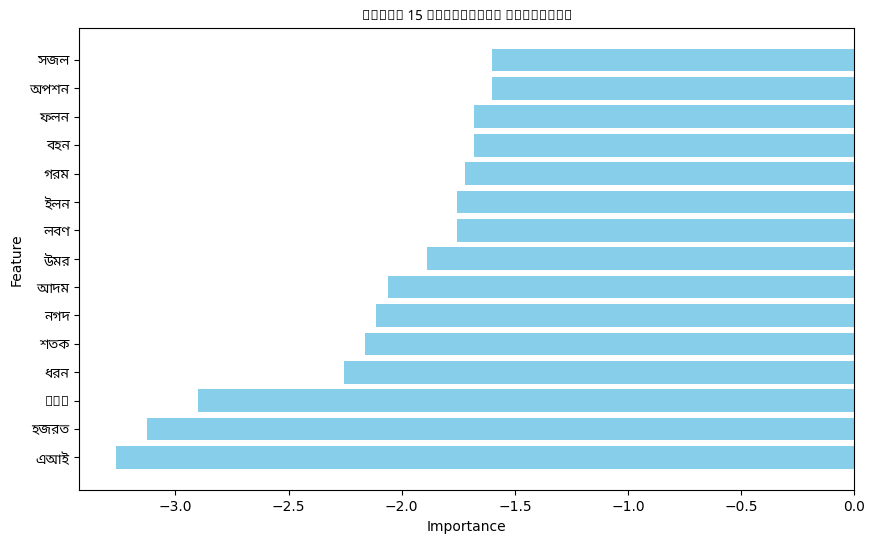

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# Create directory for fonts if it doesn't exist
os.makedirs('/usr/share/fonts/truetype/noto', exist_ok=True)

# Download the Noto Sans Bengali font
!wget -q -O /usr/share/fonts/truetype/noto/NotoSansBengali-Regular.ttf https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansBengali/NotoSansBengali-Regular.ttf

# Set the font properties for Bengali
bengali_font_path = '/usr/share/fonts/truetype/noto/NotoSansBengali-Regular.ttf'
bengali_font = fm.FontProperties(fname=bengali_font_path)

# Plot the top 15 important features
least_15_features = filtered_feature_df.tail(15)

plt.figure(figsize=(10, 6))
bars = plt.barh(least_15_features['Feature'], least_15_features['Importance'], color='skyblue')

# Set font properties for Bengali labels
plt.yticks(ticks=range(len(least_15_features)), labels=least_15_features['Feature'], fontproperties=bengali_font)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Least 15 Important Features', fontproperties=bengali_font)
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 84 (T) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 111 (o) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 73 (I) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 109 (m) missing from current font.
  fig.canvas.print_figure(bytes_io, 

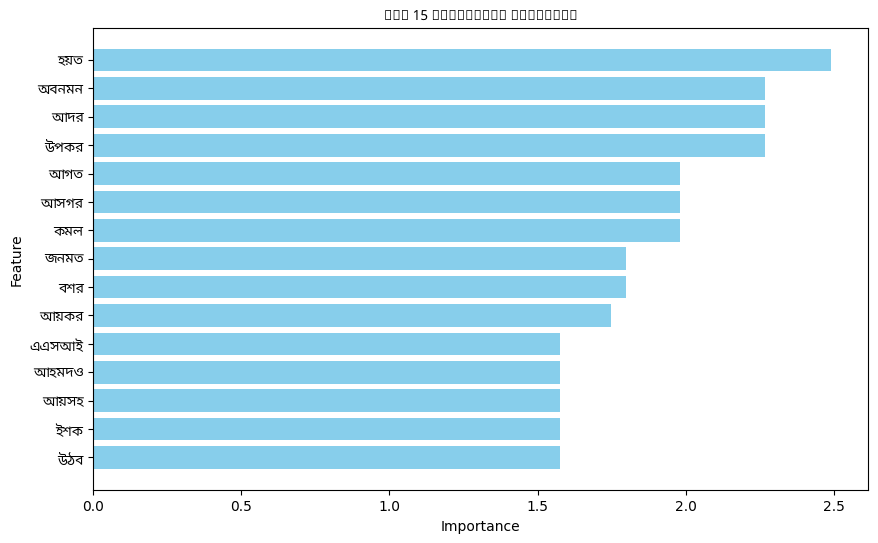

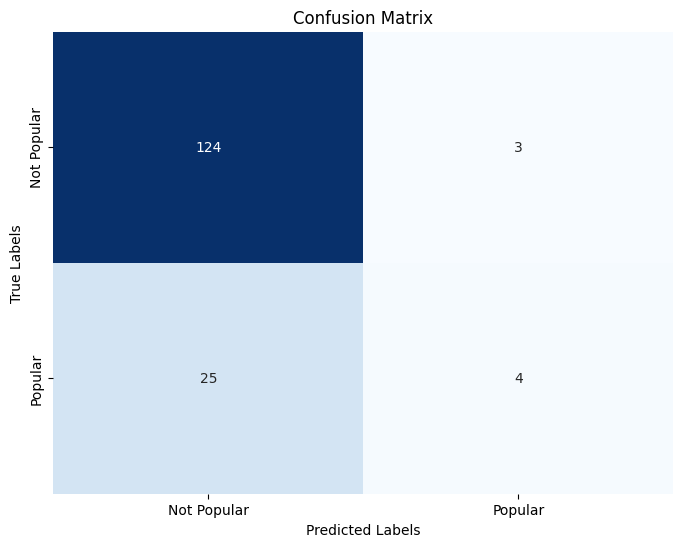

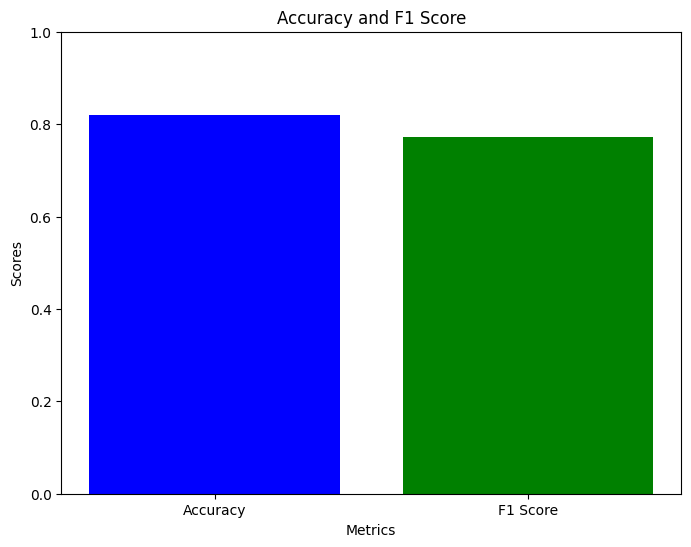

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import os

# Create directory for fonts if it doesn't exist
os.makedirs('/usr/share/fonts/truetype/noto', exist_ok=True)

# Download the Noto Sans Bengali font
!wget -q -O /usr/share/fonts/truetype/noto/NotoSansBengali-Regular.ttf https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansBengali/NotoSansBengali-Regular.ttf

# Set the font properties for Bengali
bengali_font_path = '/usr/share/fonts/truetype/noto/NotoSansBengali-Regular.ttf'
bengali_font = fm.FontProperties(fname=bengali_font_path)

# Plot the top 15 important features
top_15_features = filtered_feature_df.head(15)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')

# Set font properties for Bengali labels
plt.yticks(ticks=range(len(top_15_features)), labels=top_15_features['Feature'], fontproperties=bengali_font)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Important Features', fontproperties=bengali_font)
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot F1 Score and Accuracy
metrics = {'Accuracy': accuracy, 'F1 Score': f1}
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(8, 6))
plt.bar(names, values, color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Accuracy and F1 Score')
plt.ylim(0, 1)  # Assuming that scores are between 0 and 1
plt.show()
